In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

%matplotlib inline

In [2]:
K = 3 #number of clusters
D = 2 #number of dimensions for each data point
N = 1000 #number of data points
Ns = [300, 400, 300] #number of data point clusters

means = 5 * np.random.randn(K, D) #centers/centroids
x = []
for n, m in zip(Ns, means):
    print(n, m)
    x.append(np.random.randn(n, D) + m) #for each mean, create an n by D matrix and add to it

300 [ 2.48357077 -0.69132151]
400 [3.23844269 7.61514928]
300 [-1.17076687 -1.17068478]


In [3]:
means #the centers of the clusters

array([[ 2.48357077, -0.69132151],
       [ 3.23844269,  7.61514928],
       [-1.17076687, -1.17068478]])

In [4]:
[x_.shape for x_ in x] #the dimension for each data point is 2 dimensions

[(300, 2), (400, 2), (300, 2)]

In [5]:
m

array([-1.17076687, -1.17068478])

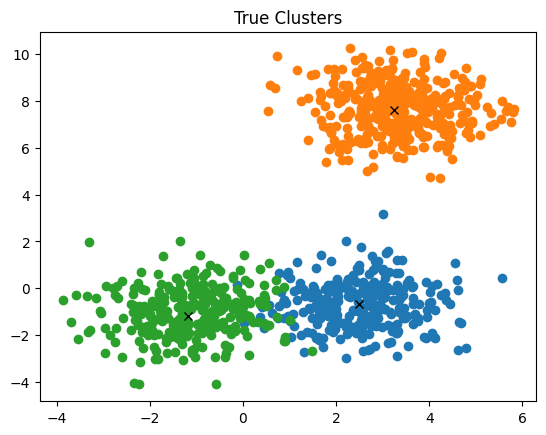

In [6]:
for x_, m in zip(x, means):
    plt.scatter(x_[:, 0], x_[:, 1])
    plt.plot(m[0], m[1], 'kx')
plt.title('True Clusters')
plt.show()

(300, 2) (2,)
(400, 2) (2,)
(300, 2) (2,)


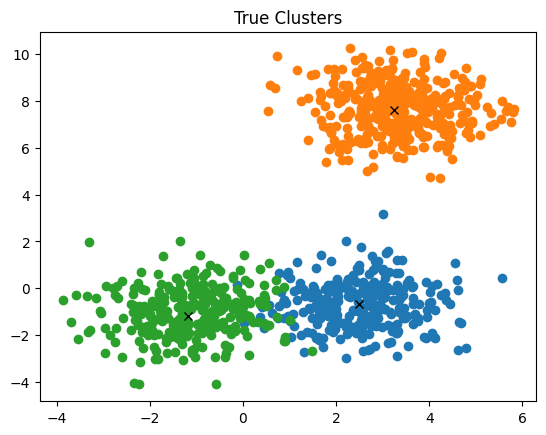

In [9]:
for x_, m in zip(x, means):
    print(x_.shape, m.shape)
    plt.scatter(x_[:, 0], x_[:, 1])
    plt.plot(m[0], m[1], 'kx') #'kx' means draw a black x
plt.title('True Clusters')
plt.show()

# Numpy VStack

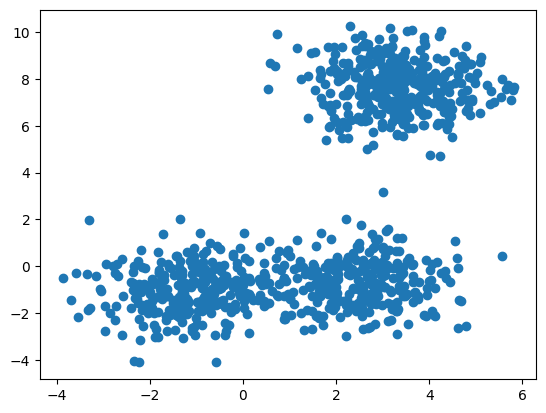

(1000, 2)

In [8]:
data = np.vstack(x)
plt.scatter(data[:, 0], data[:, 1])
plt.show()
data.shape

In [11]:
np.random.rand(3, 4)

array([[0.07686208, 0.50062427, 0.79451554, 0.70708648],
       [0.05022601, 0.07290184, 0.40287328, 0.29529049],
       [0.23238432, 0.2810045 , 0.80348274, 0.92922805]])

In [12]:
#needs a shape as an input to work
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
def distance_matrix(x, m):
    """
    Calculates the distance from each element x to each element in m.
    Parameters:
    - x: data points
    - m: possible means
    Returns:
    - distance matrix
    
    """
    d = np.zeros((len(x), len(m)))
    for i in range(len(x)):
        for j in range(len(m)):
            d[i, j] = dist(x[i, :], m[j, :]) #we need to find every single x point and mean 
    return d

def dist(x1, x2, axis = None):
    """
    Calculate euclidean distance
    """
    return np.sqrt(np.sum(np.square(x1-x2), axis))

In [19]:
x_test = np.array([[0,1], [1,0], [0,0], [1,1]])

distance_matrix(x_test, x_test)

array([[0.        , 1.41421356, 1.        , 1.        ],
       [1.41421356, 0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.41421356],
       [1.        , 1.        , 1.41421356, 0.        ]])

# Broadcasting

In [24]:
def dist(x1, x2, axis = -1):
    """
    Calculate euclidean distance
    """
    #breakpoint() #helpful using VScode Debugger
    return np.sqrt(np.sum(np.square(x1-x2), axis))

def distance_matrix2(x, m):
    #breakpoint()
    d = [dist(x, m_, axis=1) for m_ in m] #more efficient way of determining the distance
    d = np.stack(d, axis=1)
    
    return d

In [25]:
distance_matrix2(x_test, x_test)

array([[0.        , 1.41421356, 1.        , 1.        ],
       [1.41421356, 0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.41421356],
       [1.        , 1.        , 1.41421356, 0.        ]])

# Kmeans

- Intialize means (k)
- Caluclate distance
- Assign mean
- Update mean by taking the average of the points assigned to it

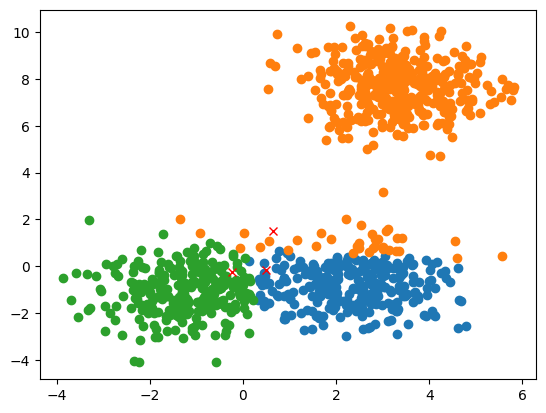

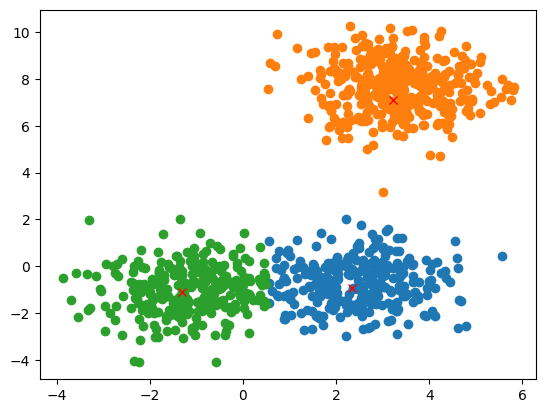

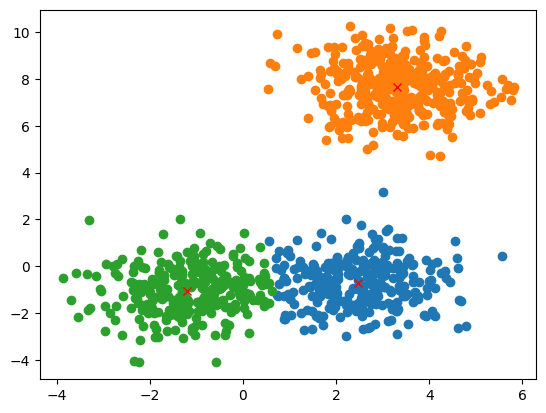

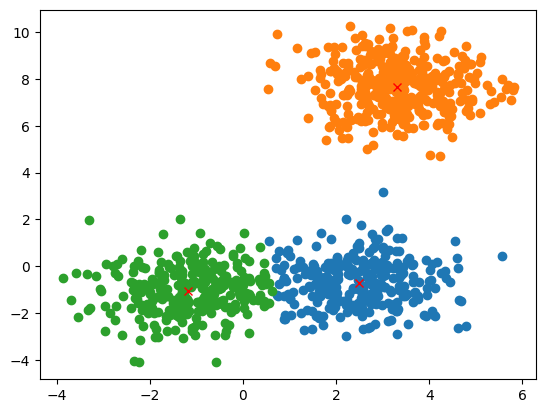

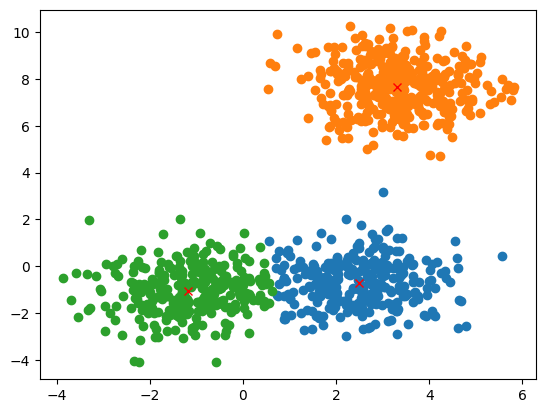

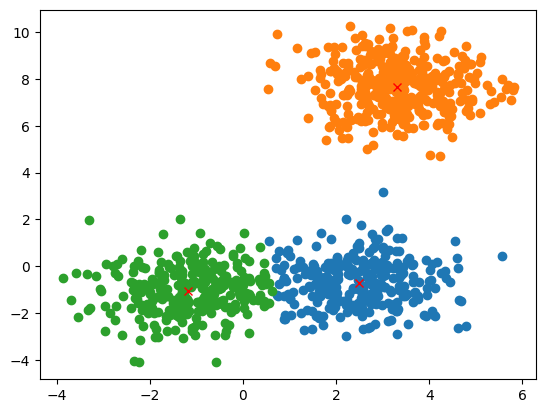

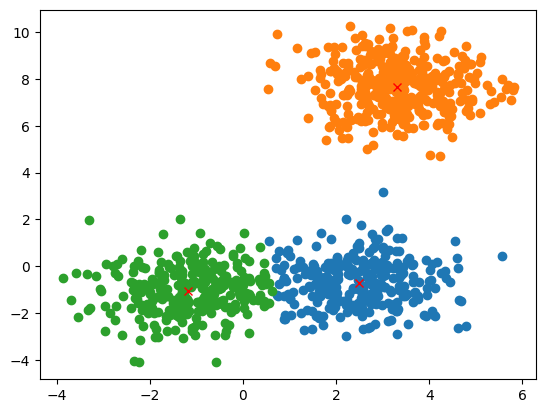

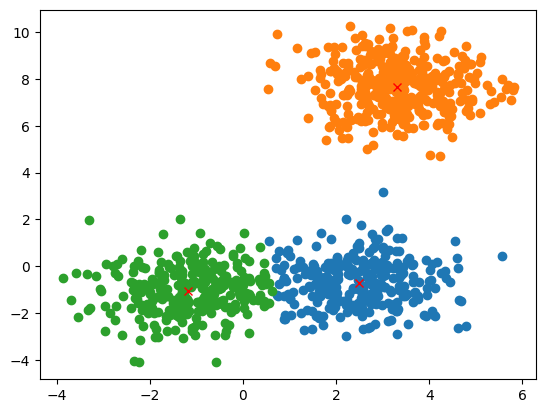

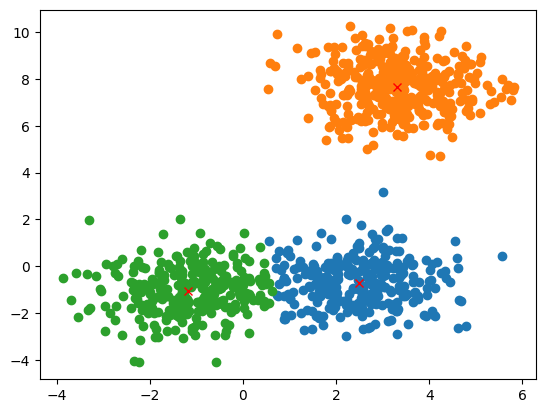

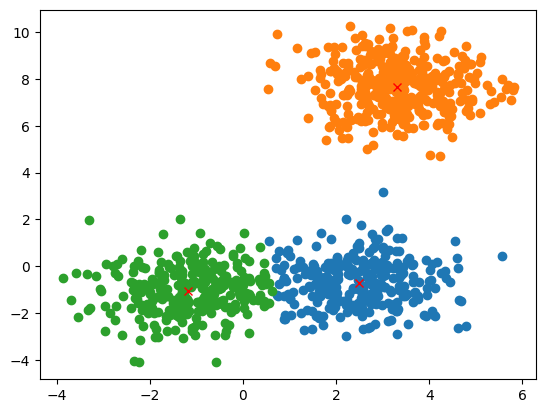

In [26]:
k = 3 #number of classes that I want (initialize the means)

iters = 10 #

np.random.seed(42)

means = np.random.randn(k, data.shape[1])

for i in range(iters):
    d = distance_matrix(data, means) #get the distance between the data and the means
    cluster = d.argmin(axis= -1) #assigne each of those points to it's closest mean
    for j in range(k):
        idx = cluster == j
        plt.plot(means[j, 0], means[j, 1], 'rx')
        plt.scatter(data[idx, 0], data[idx, 1])
        #calculate new mean
        means[j, :] = data[idx].mean(axis = 0)
    plt.show()